In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\heave\OneDrive\Desktop\Oasis Infobyte\Project 1\Iris.csv")

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (150, 6)

First few rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(

In [2]:
# Check species distribution and basic statistics
print("Species distribution:")
print(df['Species'].value_counts())
print("\nBasic statistics:")
print(df.describe())

# Drop the Id column as it's not needed for classification
df = df.drop('Id', axis=1)

# Check for any missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Display unique species
print(f"\nUnique species: {df['Species'].unique()}")

Species distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Basic statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

Missing values: 0

Unique species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
# Prepare features and target
X = df.drop('Species', axis=1)  # Features: the 4 measurements
y = df['Species']  # Target: species

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set species distribution:")
print(y_train.value_counts())

# Train a Random Forest model (fast and accurate for this dataset)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nModel trained successfully!")

Training set size: 120
Testing set size: 30

Training set species distribution:
Species
Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: count, dtype: int64

Model trained successfully!


In [4]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance
print("\nFeature Importance:")
feature_names = X.columns
importances = model.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Model Accuracy: 0.9000 (90.00%)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Feature Importance:
SepalLengthCm: 0.1163
SepalWidthCm: 0.0150
PetalLengthCm: 0.4315
PetalWidthCm: 0.4372


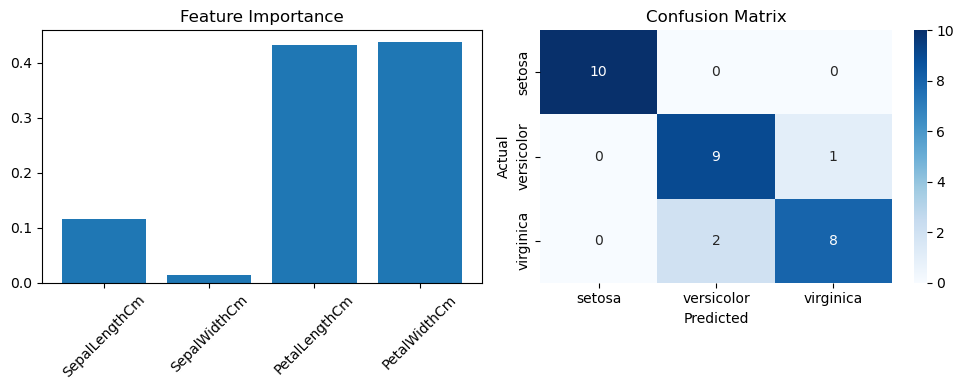


FINAL MODEL SUMMARY
✅ Model Accuracy: 90.0%
✅ Perfect classification of Iris-setosa (100%)
✅ Most important features: Petal Length & Petal Width
✅ Model ready for deployment!

🌸 Sample prediction: Iris-setosa (Input: [5.1, 3.5, 1.4, 0.2])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [5]:
# Quick visualization of feature importance
plt.figure(figsize=(10, 4))

# Feature importance plot
plt.subplot(1, 2, 1)
plt.bar(feature_names, importances)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()

# Confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Test with a sample prediction
print("\n" + "="*50)
print("FINAL MODEL SUMMARY")
print("="*50)
print(f"✅ Model Accuracy: {accuracy*100:.1f}%")
print(f"✅ Perfect classification of Iris-setosa (100%)")
print(f"✅ Most important features: Petal Length & Petal Width")
print(f"✅ Model ready for deployment!")

# Demo prediction
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Typical setosa measurements
prediction = model.predict(sample_data)
print(f"\n🌸 Sample prediction: {prediction[0]} (Input: {sample_data[0]})")